In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
# Load the dataset
dataset = pd.read_csv('Social_Network_Ads-Copy1.csv')

In [9]:
dataset['Gender'] = dataset['Gender'].replace({'Male': 1, 'Female': 0})

In [10]:
# Split the dataset into independent and dependent variables
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
# Scale the independent variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Train the logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
# Make predictions on the testing set
y_pred = classifier.predict(X_test)

In [15]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[65  3]
 [ 8 24]]


In [16]:
# Compute the true positives, false positives, true negatives, and false negatives
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

In [17]:
# Compute the accuracy, error rate, precision, and recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
error_rate = (FP + FN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [18]:
print('Accuracy: {:.2f}'.format(accuracy))
print('Error Rate: {:.2f}'.format(error_rate))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

Accuracy: 0.89
Error Rate: 0.11
Precision: 0.89
Recall: 0.75


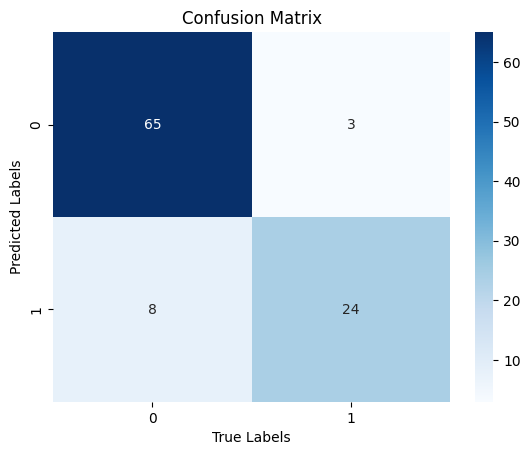

In [19]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

